In [3]:
# Imports here
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
pitches_df = pd.read_csv(r'C:\Users\Brian\Desktop\pitches.csv')
atbat_df = pd.read_csv (r'C:\Users\Brian\Desktop\atbats.csv')

In [26]:
df = pd.concat([pitches_df, atbat_df], join='inner', axis=1)
df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,518792,Double,201500001,1,1,0,L,452657,L,True
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,407812,Single,201500001,1,1,0,L,452657,R,True
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [27]:
df.dropna(inplace=True)

In [28]:
dtypes = df.columns.to_series().groupby(df.dtypes).groups
dtypes

{dtype('bool'): Index(['top'], dtype='object'),
 dtype('int64'): Index(['event_num', 'ab_id', 'batter_id', 'g_id', 'inning', 'o', 'p_score',
        'pitcher_id'],
       dtype='object'),
 dtype('float64'): Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
        'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
        'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
        'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'b_score', 'ab_id', 'b_count',
        's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
       dtype='object'),
 dtype('O'): Index(['code', 'type', 'pitch_type', 'event', 'p_throws', 'stand'], dtype='object')}

In [29]:
# Drop this column because type simplifies this column
df.drop(columns='code', inplace=True)

In [30]:
df.type.value_counts()

S    332884
B    264744
X    135985
Name: type, dtype: int64

In [31]:
df.pitch_type.value_counts()

FF    261220
SL    106934
FT     83905
CH     77203
SI     71946
CU     55738
FC     40493
KC     16379
FS     11746
KN      3948
IN      3279
EP       319
PO       247
FO       215
UN        23
FA         9
SC         7
AB         2
Name: pitch_type, dtype: int64

In [32]:
df.loc[df.pitch_type.isin(['FF', 'FT', 'FC', 'FS', 'SI']), 'pitch_type'] = 'fastball'
df.loc[df.pitch_type.isin(['CU', 'SL', 'SC', 'KC', ]), 'pitch_type'] = 'break'
df.loc[df.pitch_type.isin(['CH', 'KN', 'EP']), 'pitch_type'] = 'changeup'
df.loc[df.pitch_type.isin(['B', 'F', 'FO', 'UN', 'FA', 'IN', 'PO', 'AB']), 'pitch_type'] = 'other'

In [33]:
df.pitch_type.value_counts()

fastball    469310
break       179058
changeup     81470
other         3775
Name: pitch_type, dtype: int64

In [34]:
df.event.value_counts()

Strikeout               155627
Groundout               133657
Single                  107797
Flyout                   80004
Walk                     56379
Lineout                  44538
Pop Out                  34136
Double                   32890
Home Run                 21969
Forceout                 14984
Grounded Into DP         14605
Hit By Pitch              6881
Field Error               6332
Sac Fly                   4735
Sac Bunt                  3933
Intent Walk               3746
Triple                    3412
Double Play               1790
Runner Out                1728
Bunt Groundout            1242
Fielders Choice Out       1241
Strikeout - DP             573
Bunt Pop Out               563
Fielders Choice            393
Batter Interference        156
Catcher Interference       152
Sac Fly DP                  75
Bunt Lineout                51
Triple Play                 20
Sacrifice Bunt DP            4
Name: event, dtype: int64

In [35]:
df.loc[df.event.isin(['Strikeout', 'Groundout', 'Flyout', 'Lineout', 'Pop Out', 'Forceout', 'Grounded Into DP'
                     , 'Sac Fly', 'Sac Bunt', 'Double Play', 'Runner Out', 'Bunt Groundout', 'Fielders Choice Out',
                     'Strikeout - DP', 'Bunt Pop Out', 'Fielders Choice', 'Batter Interference', 'Catcher Interference',
                     'Sac Fly DP', 'Bunt Lineout', 'Triple Play', 'Sacrifice Bunt DP']), 'event'] = 'Out'
df.loc[df.event.isin(['Single', 'Double', 'Home Run', 'Triple']), 'event'] = 'Hit'
df.loc[df.event.isin(['Walk', 'Hit By Pitch', 'Intent Walk']), 'event'] = 'Walk'

In [36]:
df.event.value_counts()

Out            494207
Hit            166068
Walk            67006
Field Error      6332
Name: event, dtype: int64

In [37]:
df.p_throws.value_counts()

R    537329
L    196284
Name: p_throws, dtype: int64

In [38]:
df.stand.value_counts()

R    429014
L    304599
Name: stand, dtype: int64

In [39]:
df = df.sample(n=50000).copy()

In [40]:
dummy_df = pd.get_dummies(df, drop_first=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 216747 to 316752
Data columns (total 50 columns):
px                 50000 non-null float64
pz                 50000 non-null float64
start_speed        50000 non-null float64
end_speed          50000 non-null float64
spin_rate          50000 non-null float64
spin_dir           50000 non-null float64
break_angle        50000 non-null float64
break_length       50000 non-null float64
break_y            50000 non-null float64
ax                 50000 non-null float64
ay                 50000 non-null float64
az                 50000 non-null float64
sz_bot             50000 non-null float64
sz_top             50000 non-null float64
type_confidence    50000 non-null float64
vx0                50000 non-null float64
vy0                50000 non-null float64
vz0                50000 non-null float64
x                  50000 non-null float64
x0                 50000 non-null float64
y                  50000 non-null float64
y0 

In [21]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 2.84132268e-01,  1.45024181e+00,  6.19740442e-01, ...,
        -3.14024450e-01,  6.06096591e-01, -1.18308615e+00],
       [ 4.46034847e-01, -7.71058215e-01, -7.69863171e-01, ...,
        -3.14024450e-01,  6.06096591e-01, -1.18308615e+00],
       [-7.09015097e-01,  5.76339796e-01,  1.02155354e+00, ...,
         3.18446541e+00,  6.06096591e-01,  8.45246984e-01],
       ...,
       [-1.24905256e+00,  1.24029300e-01,  8.03904777e-01, ...,
        -3.14024450e-01,  6.06096591e-01, -1.18308615e+00],
       [-6.49252400e-01,  3.08343179e-01,  2.78590411e-04, ...,
        -3.14024450e-01,  6.06096591e-01, -1.18308615e+00],
       [ 3.46068154e-01, -1.30196739e-01,  1.70208026e-02, ...,
         3.18446541e+00,  6.06096591e-01,  8.45246984e-01]])

In [22]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)
pca_components

array([[-2.88020441, -0.81451768],
       [ 2.48309682, -1.08745259],
       [-2.42319507, -0.616354  ],
       ...,
       [-2.04107708, -2.04552078],
       [ 0.85820624, -0.50735462],
       [ 1.37566363, -0.00925978]])

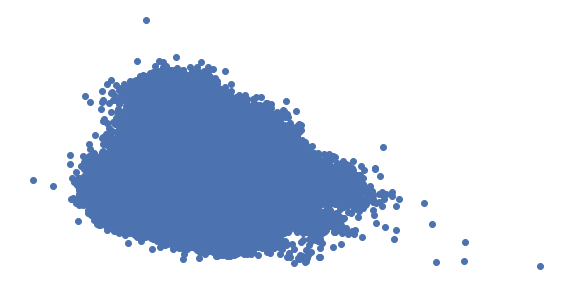

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

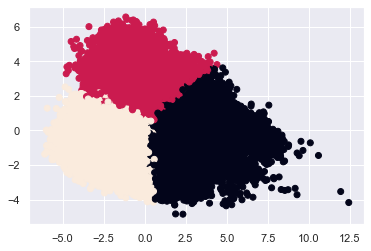

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
y_pred = kmeans.predict(scaled_df)

plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

(array([4.0000e+00, 2.0000e+00, 1.6000e+01, 4.5000e+01, 3.3500e+02,
        2.6430e+03, 9.0430e+03, 1.6947e+04, 1.9910e+04, 1.0550e+03]),
 array([37.5 , 43.25, 49.  , 54.75, 60.5 , 66.25, 72.  , 77.75, 83.5 ,
        89.25, 95.  ]),
 <a list of 10 Patch objects>)

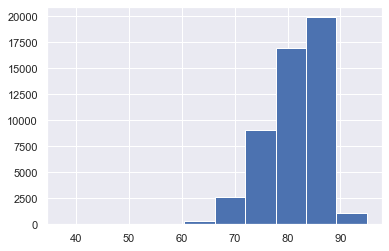

In [42]:
plt.hist(df['end_speed'])

In [69]:
df['cluster'] = y_pred
df.cluster.value_counts()

2    22744
0    18000
1     9256
Name: cluster, dtype: int64

In [70]:
df_cluster_0 = df.loc[df.cluster == 0]
df_cluster_1 = df.loc[df.cluster == 1]
df_cluster_2 = df.loc[df.cluster == 2]

In [57]:
df_cluster_0.pitch_type.value_counts()

fastball    6838
break       2615
changeup    1177
other         55
Name: pitch_type, dtype: int64

<BarContainer object of 4 artists>

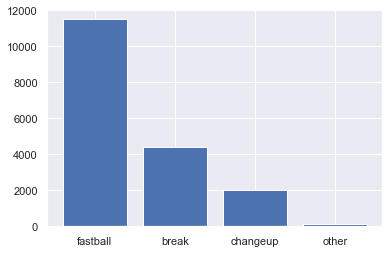

In [71]:
plt.bar(x = df_cluster_0['pitch_type'].value_counts().index, height= df_cluster_0['pitch_type'].value_counts().values)

<BarContainer object of 4 artists>

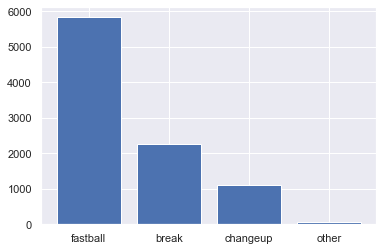

In [72]:
plt.bar(x = df_cluster_1['pitch_type'].value_counts().index, height= df_cluster_1['pitch_type'].value_counts().values)

<BarContainer object of 4 artists>

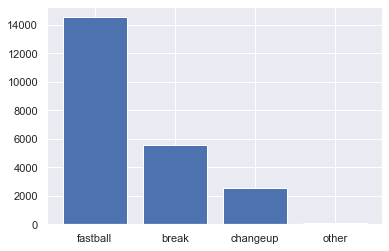

In [73]:
plt.bar(x = df_cluster_2['pitch_type'].value_counts().index, height= df_cluster_2['pitch_type'].value_counts().values)

(array([5.238e+03, 8.590e+03, 2.995e+03, 1.071e+03, 1.020e+02, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.9 ,  4.53,  8.16, 11.79, 15.42, 19.05, 22.68, 26.31, 29.94,
        33.57, 37.2 ]),
 <a list of 10 Patch objects>)

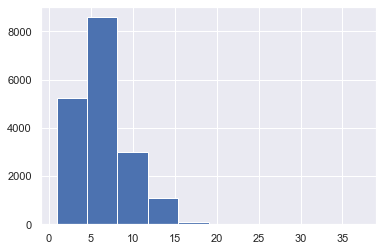

In [74]:
plt.hist(df_cluster_0['break_length'])

(array([5.700e+02, 3.603e+03, 2.881e+03, 1.322e+03, 5.490e+02, 2.920e+02,
        3.500e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.7 ,  3.19,  5.68,  8.17, 10.66, 13.15, 15.64, 18.13, 20.62,
        23.11, 25.6 ]),
 <a list of 10 Patch objects>)

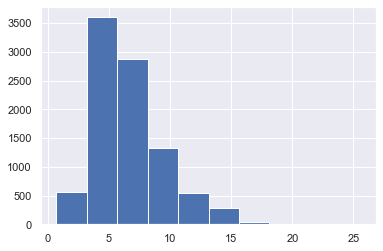

In [75]:
plt.hist(df_cluster_1['break_length'])

(array([4.8990e+03, 1.0288e+04, 5.0140e+03, 1.8180e+03, 6.8600e+02,
        3.5000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.1 ,  4.16,  7.22, 10.28, 13.34, 16.4 , 19.46, 22.52, 25.58,
        28.64, 31.7 ]),
 <a list of 10 Patch objects>)

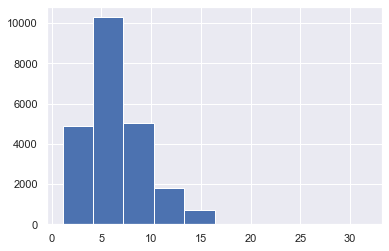

In [76]:
plt.hist(df_cluster_2['break_length'])